In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [6]:
y = data['Price']
X = data.drop('Price', axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
print("Coefficients: \n", model.coef_) #коэффициенты модели

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [12]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)] #коэффициенты вместе с названиями соответствующих атрибутов

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [13]:
print("Intercept: \n", model.intercept_) #свободный коэффициент

Intercept: 
 -36.94192020718441


2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
* Метод опорных векторов
 - Без ядра
 - С гауссовым ядром
 - С полиномиальным ядром
* Метод ближайших соседей
* Многослойный перцептрон
* Дерево решений
* Другие методы:
  - Гребневую регрессию
  - Регрессию Лассо
  - Регрессию ElasticNet
  - Случайный лес
  - Беггинг

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [26]:
#создадим словарь со всеми необходимыми моделями:
models = {
    "Метод опорных векторов без ядра" : LinearSVR(),
    "Метод опорных векторов с гауссовым ядром" : SVR(kernel="rbf"),
    "Метод опорных векторов с полиномиальным ядром" : SVR(kernel="poly"),
    "Метод ближайших соседей" : KNeighborsRegressor(n_neighbors=5),
    "Многослойный перцептрон" : MLPRegressor(max_iter=1000),
    "Дерево решений" : DecisionTreeRegressor(),
    "Гребневую регрессию" : Ridge(),
    "Регрессию Лассо" : Lasso(),
    "Регрессию ElasticNet" : ElasticNet(),
    "Случайный лес" : RandomForestRegressor(),
    "Беггинг" : BaggingRegressor(estimator=DecisionTreeRegressor()),
}

In [19]:
#поделим данные на контролирующую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

1.400003370766306


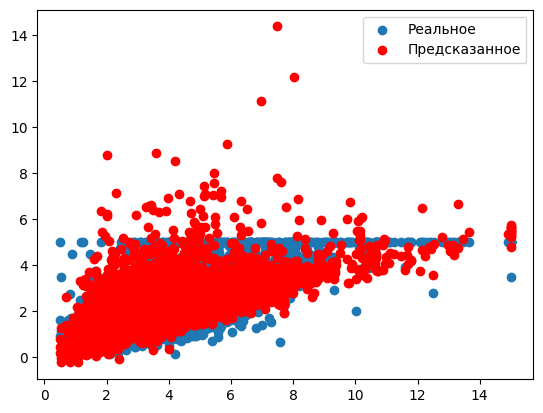

1.3892893040167151


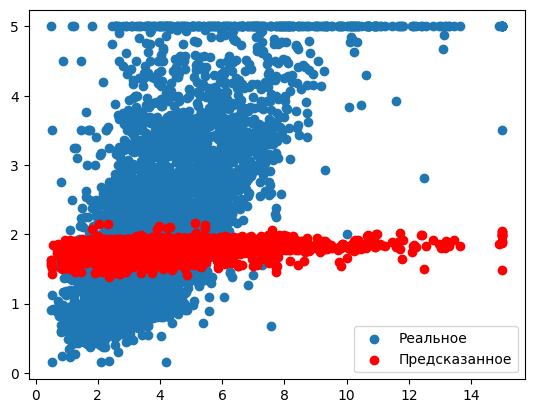

1.3976266938552866


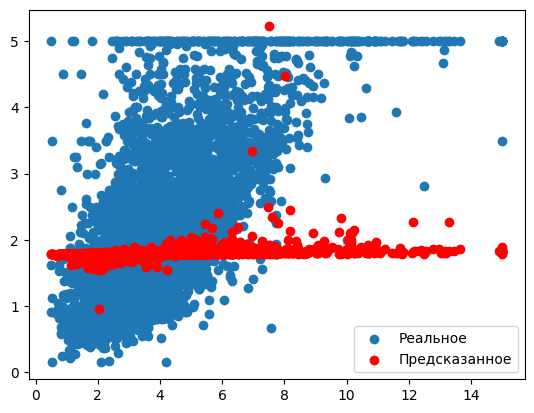

1.1663890788383697


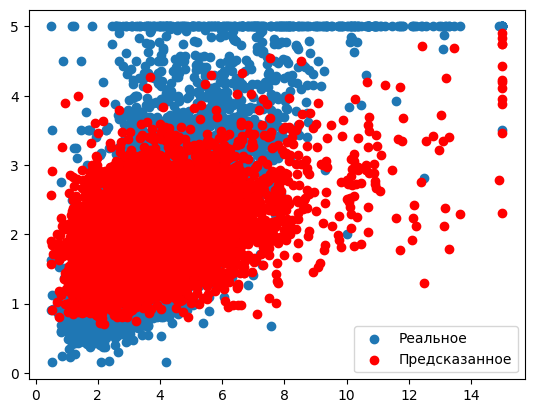

0.6393531881249305


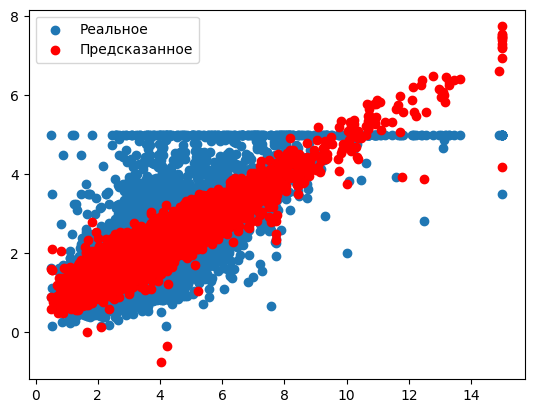

0.5711463555895349


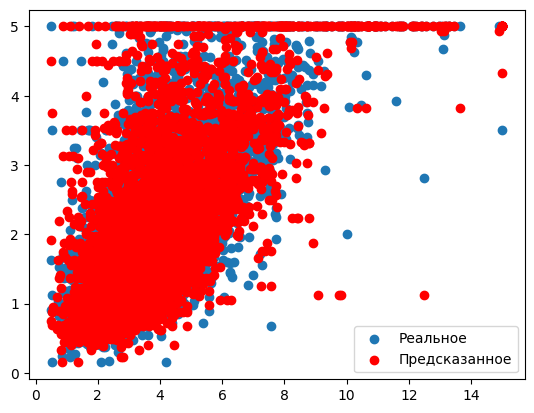

0.5361630279678808


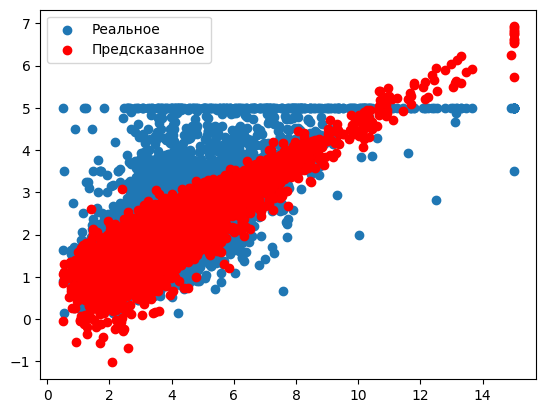

0.9710837614037963


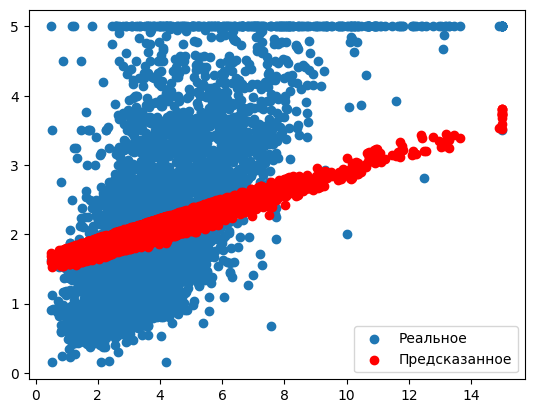

0.7817029514425156


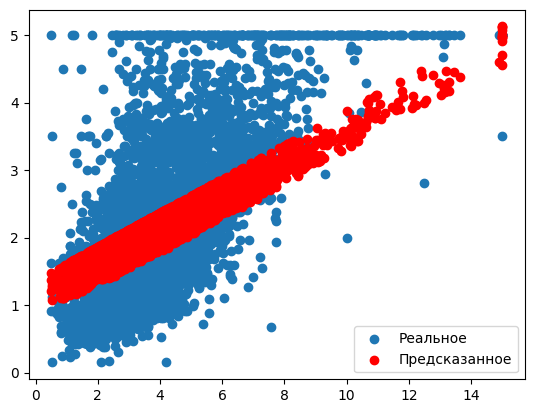

0.2688624088075726


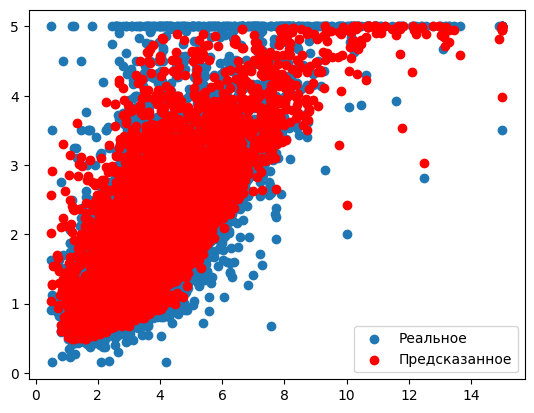

0.2973958708378131


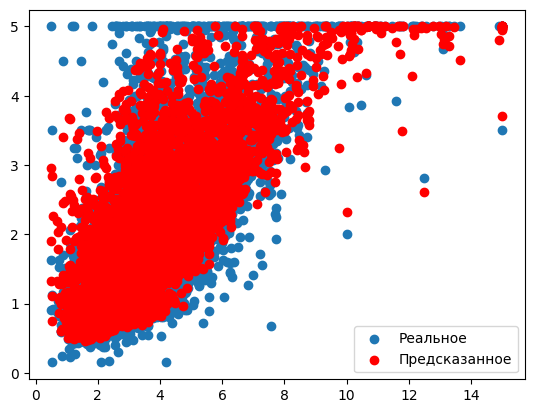

In [21]:
for i in models.keys():
    models[i].fit(X_train, y_train)
    err = mean_squared_error(y_test, models[i].predict(X_test))
    print(err)
    plt.scatter(X_test["MedInc"], y_test, label='Реальное')
    plt.scatter(X_test["MedInc"], models[i].predict(X_test), color='r', label='Предсказанное')
    plt.legend()
    plt.show()

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [27]:
def func_models(dataset, models):
    X = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
    Y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=13)

    res = {}
    for i in models.keys():
        models[i].fit(X_train, y_train)
        err = mean_squared_error(y_test, models[i].predict(X_test))
        res[i] = err
    return res

In [30]:
model_ = func_models(dataset=fetch_california_housing(), models=models)
for model_, mse in model_():
    print(model, mse)

TypeError: ignored

4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [ ]:
from sklearn.datasets import load_diabetes
diabets = load_diabetes()

In [ ]:
diabets.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
data = pd.DataFrame(diabets.data, columns = diabets.feature_names)
data['y'] = diabets.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
y = data['y']
X = data.drop('y', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients: \n", model.coef_) #b1, b2...

Coefficients: 
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)] #какие коэффициенты при каких факторах

age -10.009866299810684
sex -239.81564367242237
bmi 519.84592005446
bp 324.38464550232356
s1 -792.1756385522286
s2 476.7390210052569
s3 101.04326793803338
s4 177.06323767134643
s5 751.2736995571034
s6 67.62669218370515


In [ ]:
print("Intercept: \n", model.intercept_) #b0

Intercept: 
 152.13348416289597


In [ ]:
#Сделаем предсказания модели и выведем на экран первые несколько точек
y_pred = model.predict(X)
print(y_pred[:5])

[206.11667725  68.07103297 176.88279035 166.91445843 128.46225834]


In [ ]:
#Реальные значения:
print(y[:5])

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: y, dtype: float64


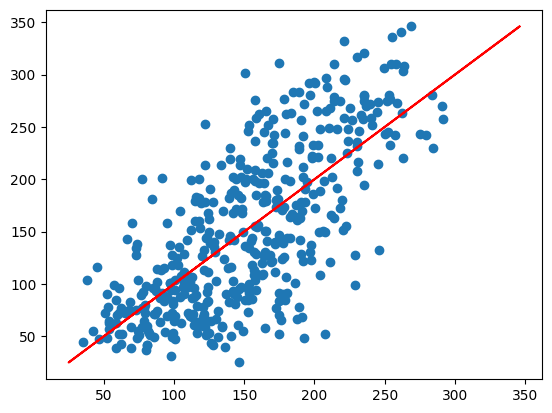

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
#коэфф детерминации:
model.score(X, y)

0.5177484222203499

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

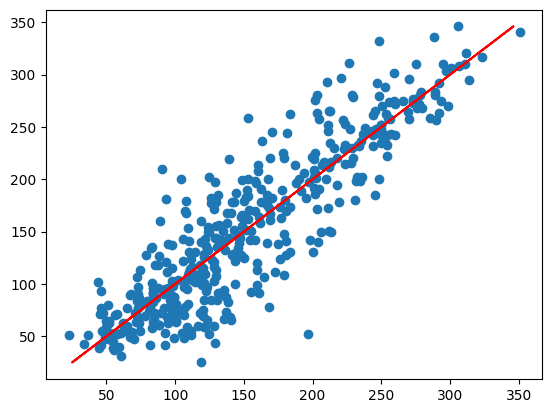

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.798067172379237